In [1]:
import Hyper_Meer as HM

In [2]:
from visuals import *
from osgeo import gdal
import sys
from spectral.io import envi
import numpy as np
import matplotlib.pyplot as plt 

In [30]:
"""

Below section verifies Kerry's work

"""

"\n\nBelow section verifies Kerry's work\n\n"

In [3]:
x_start, x_end = 0, 598
y_start, y_end = 0, 1000

file = "/beegfs/scratch/brodrick/shift/flight_products/20220224/l2a/ang20220224t195402/output/ang20220224t195402_rfl"
arr = envi.open(file + '.hdr').open_memmap(interleave='bip')[y_start:y_start+y_end, x_start:x_start+x_end, :].copy()
arr = np.transpose(arr, (0,1,2))

# raster = gdal.Open(file)
# arr = raster.ReadAsArray(xoff=x_start, yoff=y_start, xsize=x_start, ysize=y_end)
arr.shape

(1000, 598, 425)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


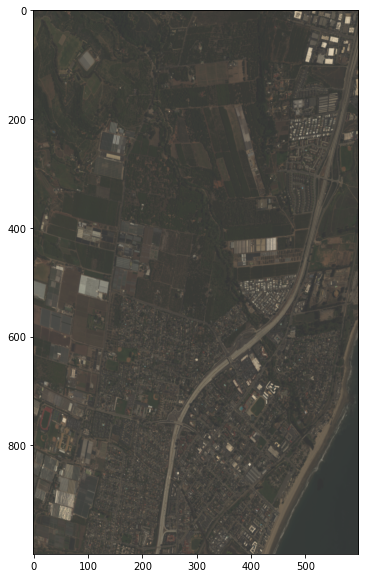

In [4]:
fig = plt.figure(figsize = (12, 10))
r = arr[:,:,54]
g = arr[:,:,34]
b = arr[:,:,16]
img = np.dstack((r, g, b))
plt.imshow(img);

a = np.ones(arr.shape[:2])
b = np.ones(arr.shape[:2])
c = np.ones(arr.shape[:2])
img2 = np.dstack((a,b,c))
plt.imshow(img2, alpha = 0.2);

In [5]:
noise = HM.HyperMeer(np.array(arr))

Cannot determine noise
1.329795879197292e-07
Cannot determine noise
8.676809673380568e-20
Cannot determine noise
9.017388070810106e-11
Cannot determine noise
5.747121923334253e-08
Cannot determine noise
1.8668802546190342e-07
Cannot determine noise
1.697130900293049e-07
Cannot determine noise
3.2526839363743506e-07
Cannot determine noise
3.659131536512788e-07
Cannot determine noise
4.211976071625637e-07
Cannot determine noise
3.751154884137952e-07
Cannot determine noise
3.831421689403849e-07
Cannot determine noise
3.8972802218585645e-07
Cannot determine noise
3.6002329724151563e-07
Cannot determine noise
3.482547606201103e-07
Cannot determine noise
3.078146224777416e-07
Cannot determine noise
3.2037436896220594e-07
Cannot determine noise
3.0227098279052397e-07
Cannot determine noise
3.255887523188167e-07
Cannot determine noise
3.445683235503368e-07
Cannot determine noise
3.4867266621736305e-07
Cannot determine noise
3.5230126856717214e-07
Cannot determine noise
4.051317874756124e-07
Ca

In [7]:
kerry_noise = open("/home/makiper/Notebooks/SHIFT_noise_M_allbands_2.txt", "rb").read()
kerry_noise = str(kerry_noise).replace("b","").replace("'", "")
kerry_noise = np.array([float(i) for i in str(kerry_noise).split(",") if i != ''])

In [11]:
# where dont't the numbers line up?
[i for i in range(425) if np.round(kerry_noise[i],7) != np.round(noise[0][i],7)]

[132, 301, 363, 368]

In [44]:
# THIS SHOWS THAT THE RESULTS ARE THE SAME, WITH A SMALL ROUNDING ERROR (looking into the numbers, they're the same)

In [32]:
"""

Below section builds out the mining noise matrix

"""

'\n\nBelow section builds out the mining noise matrix\n\n'

In [45]:
# Create the mining noise matrix with only 20220224 (may have too little points - compare to noise across all time steps to verify)

In [5]:
import pickle 

with open("/home/makiper/Notebooks/true_mining_rfls_corrected.pickle", "rb") as f:
    mining_rfls = pickle.load(f)

In [6]:
m = np.reshape(mining_rfls['20220224'][:2200], (50, 44, 425)) #need to reshape in order to pass through the Meer function

mining_noise = HM.HyperMeer(m)

Total Runs: 17 

Starting run number: 0
Starting run number: 1
Starting run number: 2
Starting run number:Starting run number: 4
 3
Cannot determine noise
0.0009008080269845705
Starting run number: 5
Starting run number: 6
Cannot determine noise
0.001612329500771704
Starting run number: 7
Cannot determine noise
0.000925434147199941
Cannot determine noise
0.0002767732145176047
Cannot determine noise
0.0014809446024989324
Cannot determine noiseCannot determine noiseCannot determine noise
0.0016304271975680002

0.001604725798917195
Starting run number: 8

0.001730211463475984
Cannot determine noiseCannot determine noise
0.002562850536335082
Cannot determine noiseCannot determine noise
0.0016063715789526227
Cannot determine noise
0.0015571028999392948

0.0016416232914678633

Cannot determine noise0.0009554713698370115
Cannot determine noise
0.0016298772441962408
Cannot determine noiseStarting run number: 9
Cannot determine noise
0.00015266629542031932
Cannot determine noise
0.0014984042398

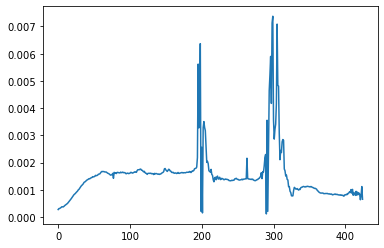

In [8]:
plt.plot(mining_noise);

In [34]:
# Create the noise matrix for the mining reflectances across the time steps

In [9]:
total_mining = np.array([])

for k,v in mining_rfls.items():
    if v.shape[0] > 1:
        if len(total_mining) == 0:
            total_mining = v
        else:
            total_mining = np.concatenate([total_mining, v], axis = 0)
    
total_mining.shape

(24376, 425)

In [10]:
m2 = np.reshape(total_mining, (554, 44, 425)) #need to reshape in order to pass through the Meer function

mining_noise2 = HM.HyperMeer(m2)

Total Runs: 17 

Starting run number: 0
Starting run number: 1
Starting run number: 2
Starting run number: 3
Starting run number: 4
Starting run number: 5
Starting run number: 6
Starting run number: 7
Starting run number: 8
Starting run number: 9
Starting run number: 10
Starting run number: 11
Starting run number: 12
Starting run number: 13
Starting run number: 14
Cannot determine noiseStarting run number: 15
Cannot determine noise
Starting run number: 16
Cannot determine noise
0.0009008080269845705

0.001604725798917195
0.0002767732145176047
Cannot determine noise
0.0014809446024989324
Cannot determine noiseCannot determine noise
0.0015571028999392948
Cannot determine noise
Cannot determine noise
0.0016304271975680002
0.001612329500771704

0.001730211463475984
Cannot determine noiseCannot determine noise
0.0013814687078434322
Cannot determine noise
0.0007822624156399378
Cannot determine noise
0.001462063540226568

0.002562850536335082
Cannot determine noiseCannot determine noiseCannot

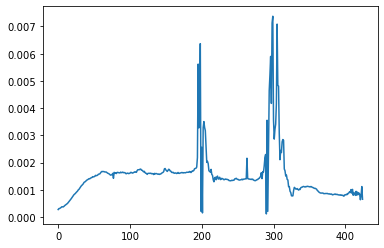

In [12]:
plt.plot(mining_noise2);

In [36]:
# LOOKS LIKE THE 2 ARE THE SAME

In [37]:
"""

Grpahical comparison between the kinds of mining noise plots

"""

'\n\nGrpahical comparison between the kinds of mining noise plots\n\n'

In [14]:
band_ranges = [(1340, 1460), (1800, 2050), 2450, 400]
wl = np.array(WAVELENGTHS)
cond_1 = ((wl > band_ranges[0][0]) & (wl < band_ranges[0][1]))
cond_2 = ((wl > band_ranges[1][0]) & (wl < band_ranges[1][1]))
cond_3 = (wl > band_ranges[2])
cond_4 = (wl < band_ranges[3])
bad_indices = list(np.where(cond_1 | cond_2 | cond_3 | cond_4)[0])
indices = [i for i in range(425) if i not in bad_indices]

In [13]:
with open("/home/makiper/Notebooks/mining_noise_2.pickle", "rb") as f:
    m_noise = pickle.load(f)
initial_noise = np.diag(m_noise)

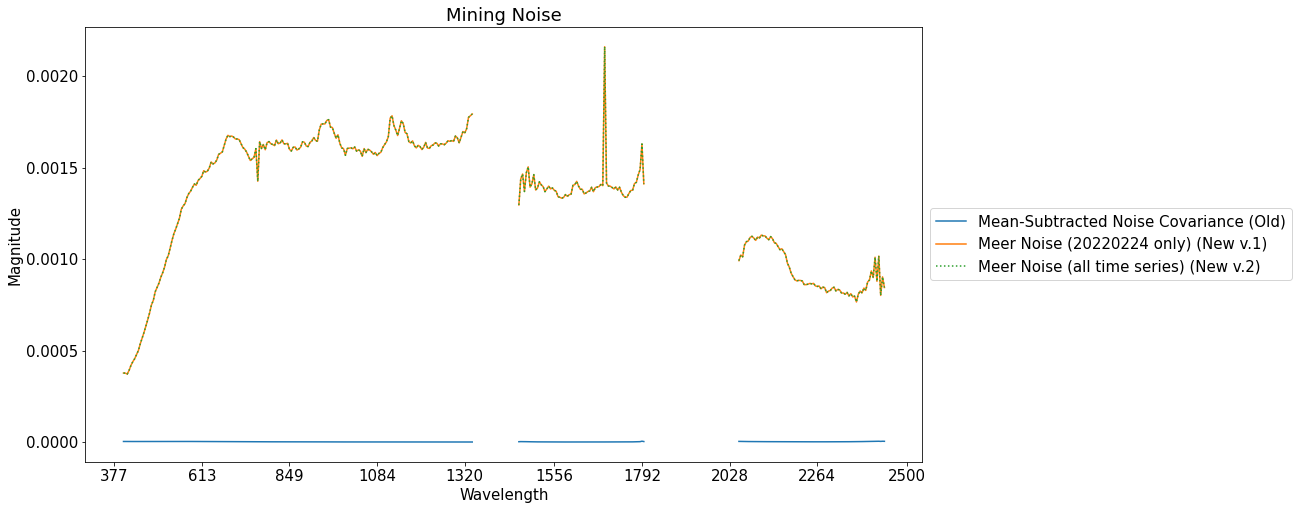

In [29]:
fig = plt.figure(figsize=(15,8))

p1 = []
p2 = []
p3 = []
index = 0
for i in range(425):
    if i in indices:
        p1.append(initial_noise[index])
        p2.append(mining_noise[i])
        p3.append(mining_noise2[i])
        index+=1
    else:
        p1.append(np.nan)
        p2.append(np.nan)
        p3.append(np.nan)

plt.plot(p1, label="Mean-Subtracted Noise Covariance (Old)");
plt.plot(p2, label="Meer Noise (20220224 only) (New v.1)");
plt.plot(p3, linestyle="dotted", label="Meer Noise (all time series) (New v.2)");


n = 10
x_t1 = [int(i) for i in np.linspace(np.array(WAVELENGTHS)[0], np.array(WAVELENGTHS)[-1], n)]
x_t0 = [int(i) for i in np.linspace(0, 425, 10)]
plt.xticks(x_t0, x_t1)
plt.title("Mining Noise", fontsize=18);
plt.xlabel("Wavelength", fontsize=15);
plt.ylabel("Magnitude", fontsize=15);
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15);

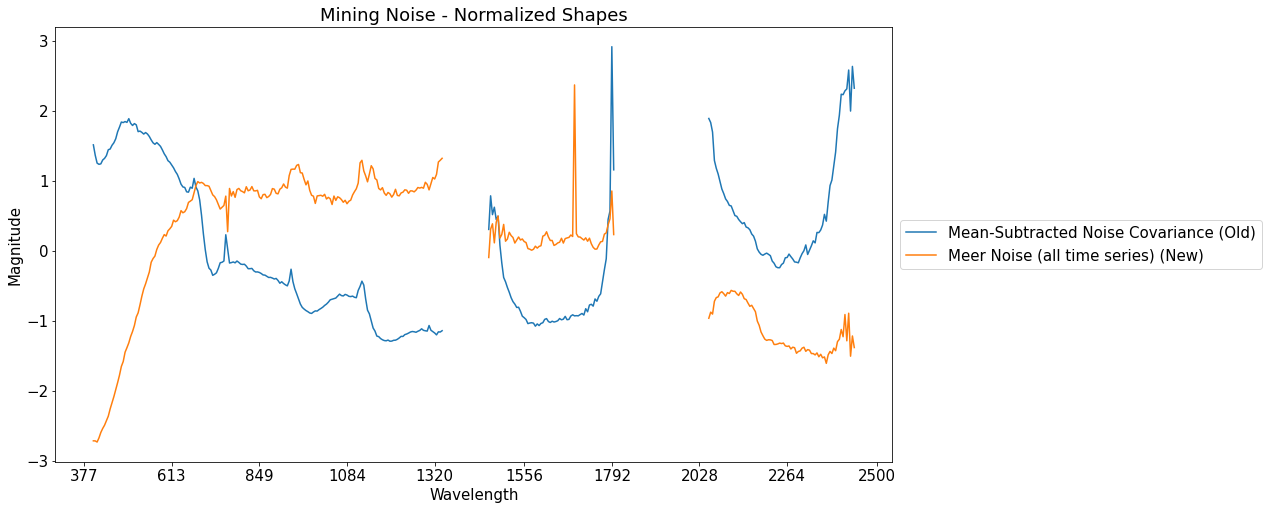

In [41]:
fig = plt.figure(figsize=(15,8))


p1 = []
p3 = []
index = 0
for i in range(425):
    if i in indices:
        p1.append(initial_noise[index])
        p3.append(mining_noise2[i])
        index+=1
    else:
        p1.append(np.nan)
        p3.append(np.nan)

p1_norm = [(i-np.nanmean(p1))/np.nanstd(p1) for i in p1]
p3_norm = [(i-np.nanmean(p3))/np.nanstd(p3) for i in p3]

plt.plot(p1_norm, label="Mean-Subtracted Noise Covariance (Old)");
plt.plot(p3_norm, label="Meer Noise (all time series) (New)");


n = 10
x_t1 = [int(i) for i in np.linspace(np.array(WAVELENGTHS)[0], np.array(WAVELENGTHS)[-1], n)]
x_t0 = [int(i) for i in np.linspace(0, 425, 10)]
plt.xticks(x_t0, x_t1)
plt.title("Mining Noise - Normalized Shapes", fontsize=18);
plt.xlabel("Wavelength", fontsize=15);
plt.ylabel("Magnitude", fontsize=15);
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15);

In [3]:
"""
Water Noise
"""

'\nWater Noise\n'

In [3]:
import pickle
# water_rfls = pickle.load(open("/home/makiper/Notebooks/water_rfls.pickle", "rb"))
water_rfls_total = pickle.load(open("/home/makiper/Notebooks/water_rfls_total.pickle", "rb"))

In [4]:
water_rfls_total.shape

(800, 341, 335)

In [5]:
water_noise_total = HM.HyperMeer(water_rfls_total)

Total Runs: 14 

Starting run number: 0
Starting run number: 1
Starting run number: 2
Starting run number: 3
Starting run number: 4
Starting run number: 5
Starting run number:Starting run number: 7
Starting run number: 8
Starting run number: 9
Starting run number: 10
Starting run number: 11
 6
Starting run number: 12
Starting run number: 13
Rule 6_2
Rule 5_2Rule 5_2
Error at 6_1

Error at 6_1Rule 5_3
Error at 6_1
Rule 6_2
Rule 5_2

Rule 6_2Rule 5_2

Rule 5_2Cannot determine noise

1.1988506937794023e-07
Error at 6_1


IOStream.flush timed out


Rule 6_2
Rule 5_2Rule 5_2

Rule 5_2
Rule 5_2
Rule 5_2
Rule 5_2Rule 6_2
Rule 5_2
Error at 6_1Error at 6_1
Cannot determine noise
1.2038598802136555e-07
Error at 6_1Rule 6_2



Rule 5_2
Rule 5_2
Rule 5_2
Cannot determine noise
1.2013331090404083e-07
Rule 6_1Rule 5_2
Rule 5_2
Rule 6_1Error at 6_1


Rule 6_2
Rule 6_2
Error at 6_1
Rule 5_2
Rule 5_2
Error at 6_1Error at 6_1

Cannot determine noiseRule 5_2
Rule 6_2
Rule 5_2
Error at 6_1
Rule 5_2
Rule 5_2Rule 5_2
Rule 6_2
1.19676192370539e-07
Rule 5_2
Rule 6_2

Rule 5_2

Rule 6_2Rule 5_2
Error at 6_1Rule 5_2


Rule 6_2
Rule 5_2
Error at 6_1Rule 5_2
Error at 6_1Cannot determine noise

Rule 6_1Rule 5_2

1.1497365362412807e-07

Rule 5_2
Rule 6_2
Rule 6_2
Rule 5_2Rule 5_2Rule 5_2Rule 5_2



Rule 6_2
Rule 6_2
Rule 5_2
Rule 6_2
Rule 5_2
Error at 6_1
Rule 5_2
Error at 6_1
Error at 6_1
Error at 6_1Rule 5_2Rule 6_2Rule 5_2


Error at 6_1Rule 6_2

Rule 5_2Rule 6_2
Error at 6_1
Cannot determine noise
Error at 6_1
Rule 5_2
Rule 5_2

Rule 5_2

1.1027369659

IOStream.flush timed out


Rule 6_2Cannot determine noise

9.743658008826766e-08
Rule 5_3
Rule 5_2
Rule 5_2
Rule 6_2
Error at 6_1
Error at 6_1Rule 6_2

Cannot determine noise
1.2632717554215415e-07
Rule 5_2
Rule 5_2
Rule 5_2
Rule 6_2
Rule 5_2Rule 5_3
Rule 5_3

Cannot determine noise
1.0324280509170392e-07
Rule 6_1
Rule 5_2
Rule 6_2
Rule 5_2Cannot determine noise

1.2366989187920275e-07
Rule 6_2
Error at 6_1
Rule 5_3
Rule 5_2
Rule 5_2
Error at 6_1


In [11]:
np.array(water_noise_total).shape

(335,)

In [13]:
band_ranges = [(1340, 1460), (1800, 2050), 2450, 400]
wl = np.array(WAVELENGTHS)
cond_1 = ((wl > band_ranges[0][0]) & (wl < band_ranges[0][1]))
cond_2 = ((wl > band_ranges[1][0]) & (wl < band_ranges[1][1]))
cond_3 = (wl > band_ranges[2])
cond_4 = (wl < band_ranges[3])
bad_indices = np.where(cond_1 | cond_2 | cond_3 | cond_4)
good_indices = [i for i in range(425) if i not in list(bad_indices[0])]

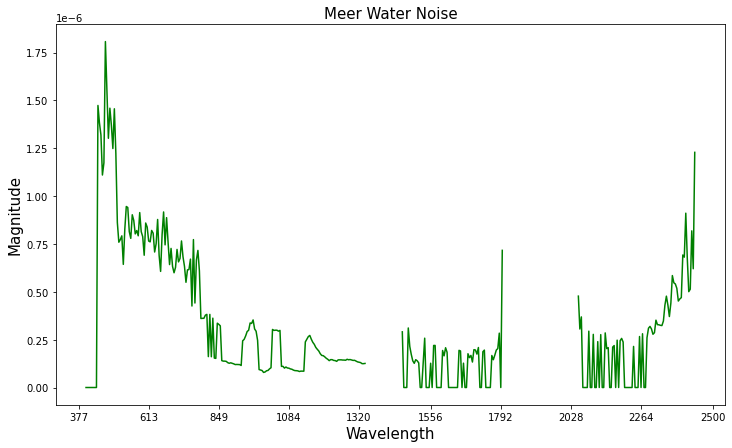

In [17]:
fig = plt.figure(figsize=(12, 7))
# plt.plot(water_noise_total);

plt_rfl = []
index = 0
for i in range(425):
    if i in good_indices:
        plt_rfl.append(water_noise_total[index])
        index += 1
    else:
        plt_rfl.append(np.nan)
        
plt.plot(plt_rfl, c='green', label="mean");

n = 10
x_t1 = [int(i) for i in np.linspace(np.array(WAVELENGTHS)[0], np.array(WAVELENGTHS)[-1], n)]
x_t0 = [int(i) for i in np.linspace(0, 425, 10)]
plt.xticks(x_t0, x_t1)

plt.title("Meer Water Noise", fontsize=15);
plt.xlabel("Wavelength", fontsize=15);
plt.ylabel("Magnitude", fontsize=15);
